In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore");

In [2]:
df = pd.read_csv("180_inj_cyc_e114_deneme.csv")

In [3]:
df.head()

,Unnamed: 0,date,tmpMoldZone25,timCool1,tmpBarrel2Zone3,tmpMoldZone3,tmpBarrel2Zone4,tmpFlange1,tmpMoldZone4,tmpBarrel2Zone1,...,sfc,frcClamp,timPlasticisation1,timPlasticisation2,reason,prsInjectionHyd1,prsTransferHyd1,strCushion1,strPlasticisation1,strTransfer1
0,21690,2021-01-18T23:28:17.000,241.0,40.06,238.5,264.6,238.3,251.2,264.9,248.0,...,[],7149.8,7.24,37.25,[],NaN,NaN,NaN,NaN,NaN
1,28917,2021-02-09T14:31:52.000,241.1,42.53,230.1,260.8,230.0,249.8,261.0,240.0,...,[],7915.0,6.17,23.86,[],NaN,NaN,NaN,NaN,NaN
2,28918,2021-02-09T14:36:04.000,241.0,42.55,230.2,260.8,229.9,250.8,260.9,240.1,...,[],7947.1,6.17,23.99,[],NaN,NaN,NaN,NaN,NaN
3,28919,2021-02-09T14:27:43.000,241.0,42.55,230.2,260.9,230.1,251.0,261.0,240.1,...,[],7927.9,6.09,24.02,[],NaN,NaN,NaN,NaN,NaN
4,28920,2021-02-09T14:30:31.000,241.0,42.55,230.0,260.9,230.1,252.6,261.0,240.0,...,[],7943.8,6.18,24.03,[],NaN,NaN,NaN,NaN,NaN


In [4]:
df['reason'] = df['reason'].replace(['[]'],0)
df['reason'][df['reason'] != 0] = 1
df = df.astype({"reason": int})

In [5]:
df.columns

Index(['Unnamed: 0', 'date', 'tmpMoldZone25', 'timCool1', 'tmpBarrel2Zone3',
       'tmpMoldZone3', 'tmpBarrel2Zone4', 'tmpFlange1', 'tmpMoldZone4',
       'tmpBarrel2Zone1', 'tmpFlange2', 'tmpMoldZone1', 'volCushion1',
       'tmpBarrel2Zone2', 'tmpMoldZone2', 'volCushion2', 'prsBackSpec2',
       'prsBackSpec1', 'spdInjection1', 'tmpMoldZone9', 'spdInjection2',
       'tmpMoldZone7', 'tmpMoldZone8', 'tmpOil', 'tmpMoldZone5',
       'tmpMoldZone6', 'tmpMoldZone19', 'cntCycle', 'tmpMoldZone18',
       'volTransfer2', 'stsMachine', 'tmpMoldZone15', 'volTransfer1',
       'tmpMoldZone14', 'tmpMoldZone17', 'tmpMoldZone16', 'timTransfer2',
       'timTransfer1', 'velPlasticisation2', 'velPlasticisation1',
       'timMoldClose', 'tmpBarrel1Zone5', 'tmpMoldZone22', 'tmpBarrel1Zone4',
       'tmpMoldZone21', 'tmpMoldZone24', 'tmpBarrel1Zone6', 'tmpMoldZone23',
       'prsPomp1', 'tmpBarrel1Zone1', 'prsPomp2', 'tmpBarrel1Zone3',
       'tmpMoldZone20', 'tmpBarrel1Zone2', 'volShot1', 'volPlasti

<AxesSubplot:>

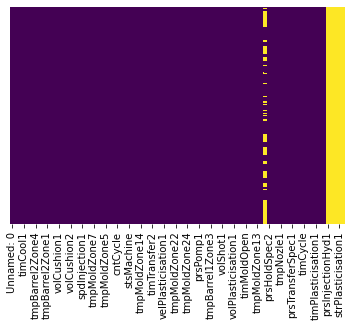

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
drop_list = ['Unnamed: 0', 'date', 'cntCycle','stsMachine','timestamp','sfc','decMold','prsInjectionHyd1','prsTransferHyd1','strCushion1','strPlasticisation1','strTransfer1']

In [8]:
df = df.drop(drop_list, axis=1)

<AxesSubplot:>

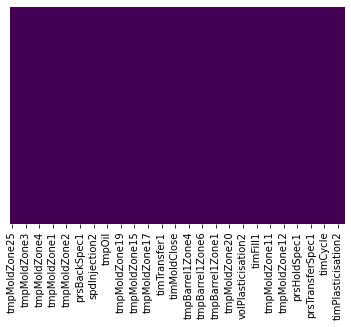

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.dtypes

tmpMoldZone25         float64
timCool1              float64
tmpBarrel2Zone3       float64
tmpMoldZone3          float64
tmpBarrel2Zone4       float64
                       ...   
timCycle              float64
frcClamp              float64
timPlasticisation1    float64
timPlasticisation2    float64
reason                  int32
Length: 74, dtype: object

In [11]:
df['reason'].value_counts()

0    36329
1     7053
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

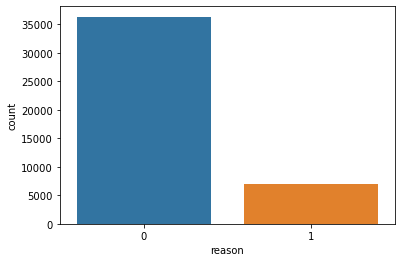

In [12]:
sns.countplot(x='reason',data=df)

<AxesSubplot:>

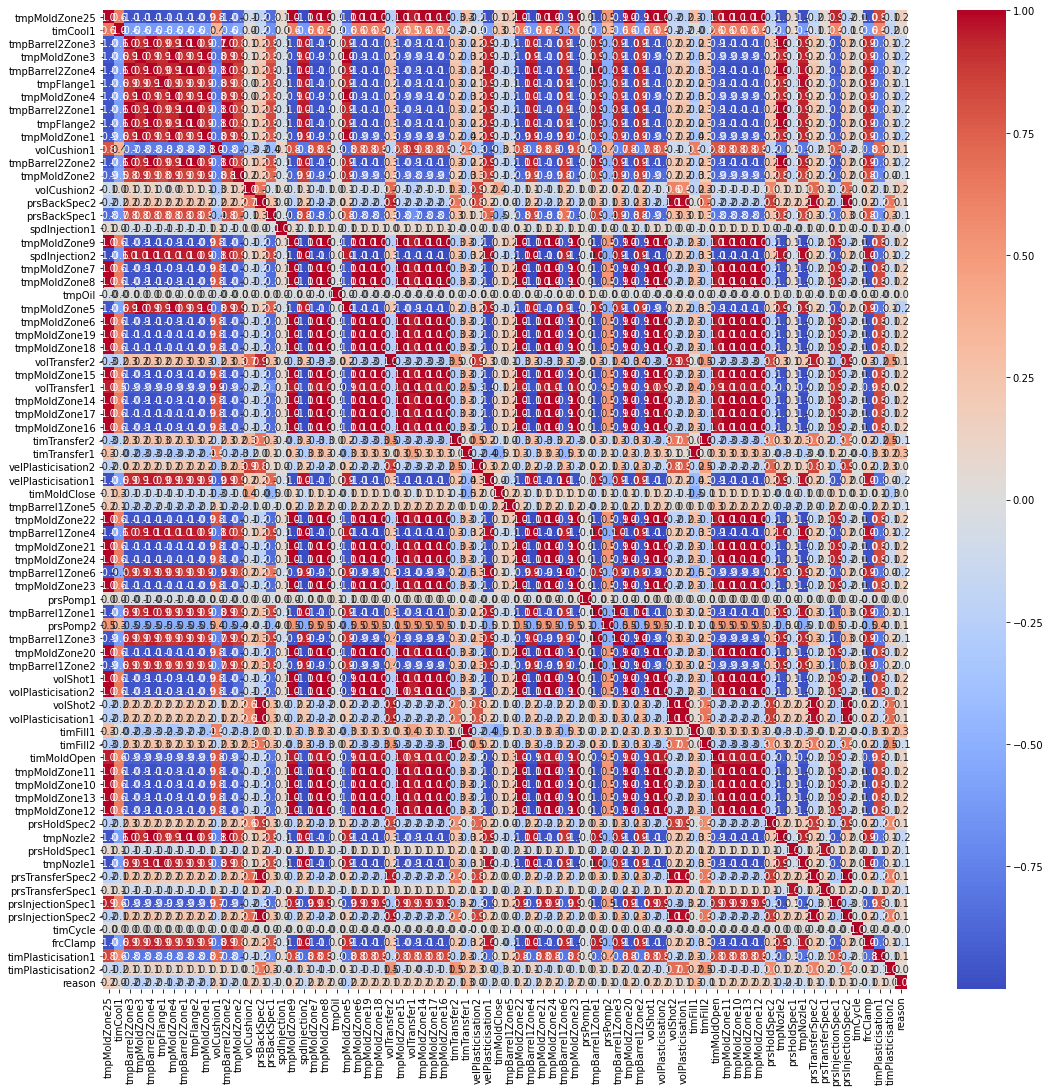

In [13]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt='.1f')

In [14]:
#Class count
count_class_0, count_class_1 = df.reason.value_counts()
#Divide by class
df_class_0 = df[df['reason'] == 0]
df_class_1 = df[df['reason'] == 1]

In [15]:
#Random Under-Sampling

In [16]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under.reason.value_counts())

Random under-sampling:
1    7053
0    7053
Name: reason, dtype: int64


In [17]:
y = df_test_under['reason']
X = df_test_under.drop(['reason'], axis=1)

In [18]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,0.964881,0.510847,-1.028895,-0.758843,-0.999851,-0.378519,-0.767101,-1.035397,-1.022255,-0.544237,...,-1.533770,-0.830877,0.130534,-1.407162,1.032495,0.124300,-0.032164,-1.148379,0.912242,0.806755
1,-1.044253,-0.685831,0.990745,0.147486,0.933722,1.107242,0.156899,0.972479,0.978158,0.133849,...,0.218855,1.035714,0.135325,0.210792,-0.931596,0.126699,-0.014061,1.269137,-0.874523,0.965857
2,-1.044319,-0.782993,0.988526,0.147486,0.932615,0.948995,0.161519,0.973563,0.973862,0.133849,...,0.156418,1.067351,0.111712,0.190946,-0.924152,0.158225,-0.074481,1.252352,-0.881740,1.046138
3,-1.031020,-0.840497,0.988526,0.612270,0.935934,0.992953,0.618899,0.972479,0.972789,0.596818,...,0.108220,1.178081,0.140459,0.150210,-0.940185,0.128412,-0.031400,1.871191,-0.835344,0.946881
4,-1.031086,-0.824633,0.988526,0.607622,0.934828,0.957787,0.623519,0.972479,0.968494,0.596818,...,0.110411,1.120080,0.137721,0.203480,-0.932168,0.133552,-0.036594,1.276562,-0.863182,0.949801


In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Confusion Matrix:
 [[1328  115]
 [  71 1308]]
Accuracy:
 0.9340892983699504
Precision:
 0.9191848208011244
Recall:
 0.9485134155184917
AUC:
 0.986216372003174


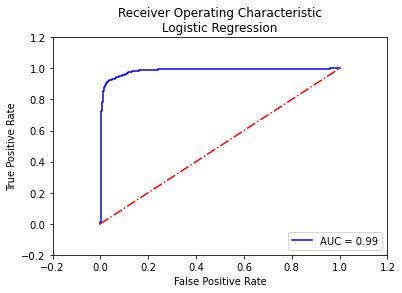

In [20]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_logreg=logreg.predict(X_val)
y_logreg_prob=logreg.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_logreg))
print("Precision:\n",metrics.precision_score(y_val,y_logreg))
print("Recall:\n",metrics.recall_score(y_val,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_val,y_logreg_prob))
auc=metrics.roc_auc_score(y_val,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

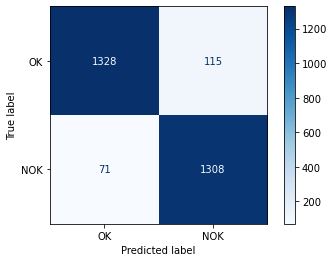

In [21]:
cm = metrics.confusion_matrix(y_val,y_logreg)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

Confusion Matrix:
 [[1393   50]
 [  54 1325]]
Accuracy:
 0.9631467044649185
Precision:
 0.9636363636363636
Recall:
 0.9608411892675852
AUC:
 0.996154323565491


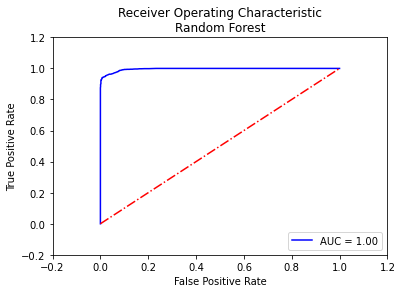

In [28]:
#Random Forest with 'entropy' criterion
from sklearn.ensemble import RandomForestClassifier

rf2=RandomForestClassifier(criterion='entropy',random_state=3)
rf2.fit(X_train,y_train)
y_rf2=rf2.predict(X_val)
y_rf_prob2=rf2.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf2))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf2))
print("Precision:\n",metrics.precision_score(y_val,y_rf2))
print("Recall:\n",metrics.recall_score(y_val,y_rf2))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob2))
auc=metrics.roc_auc_score(y_val,y_rf_prob2)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob2)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

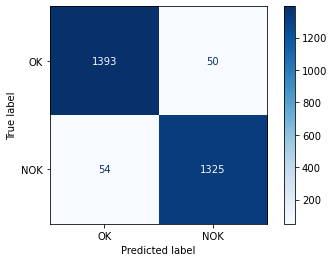

In [29]:
cm = metrics.confusion_matrix(y_val,y_rf2)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

In [46]:
threshold = 0.05

In [47]:
y_rf2_prob = rf2.predict_proba(X_val)[:,1]

In [48]:
prob_thresh = (y_rf2_prob>=threshold).astype('int')

In [49]:
CM_2_Thresh = confusion_matrix(y_val,prob_thresh)
CM_2_Thresh

array([[1177,  266],
       [   2, 1377]], dtype=int64)

Confusion Matrix:
 [[1385   58]
 [  44 1335]]
Accuracy:
 0.963855421686747
Precision:
 0.9583632447954056
Recall:
 0.9680928208846991
AUC:
 0.9959236583602066


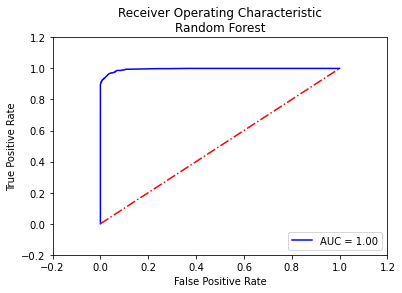

In [27]:
#Random Forest with 'gini' criterion
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=3)
rf.fit(X_train,y_train)
y_rf=rf.predict(X_val)
y_rf_prob=rf.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_rf))
print("Precision:\n",metrics.precision_score(y_val,y_rf))
print("Recall:\n",metrics.recall_score(y_val,y_rf))
print("AUC:\n",metrics.roc_auc_score(y_val,y_rf_prob))
auc=metrics.roc_auc_score(y_val,y_rf_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_rf_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

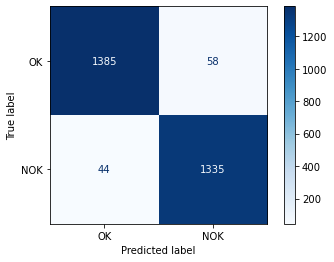

In [28]:
cm = metrics.confusion_matrix(y_val,y_rf)
classNames = ['OK','NOK']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(cmap=plt.cm.Blues)

In [35]:
df

,tmpMoldZone25,timCool1,tmpBarrel2Zone3,tmpMoldZone3,tmpBarrel2Zone4,tmpFlange1,tmpMoldZone4,tmpBarrel2Zone1,tmpFlange2,tmpMoldZone1,...,tmpNozle1,prsTransferSpec2,prsTransferSpec1,prsInjectionSpec1,prsInjectionSpec2,timCycle,frcClamp,timPlasticisation1,timPlasticisation2,reason
0,241.0,40.06,238.5,264.6,238.3,251.2,264.9,248.0,248.2,264.0,...,249.5,1942.9,1224.8,1224.8,1946.4,81.29,7149.8,7.24,37.25,0
1,241.1,42.53,230.1,260.8,230.0,249.8,261.0,240.0,240.4,260.8,...,253.1,1949.2,1204.4,1204.4,1953.6,83.44,7915.0,6.17,23.86,0
2,241.0,42.55,230.2,260.8,229.9,250.8,260.9,240.1,239.7,260.9,...,250.1,1950.8,1199.4,1199.4,1955.6,83.20,7947.1,6.17,23.99,0
3,241.0,42.55,230.2,260.9,230.1,251.0,261.0,240.1,239.3,260.9,...,251.0,1949.0,1199.1,1199.1,1953.8,83.09,7927.9,6.09,24.02,0
4,241.0,42.55,230.0,260.9,230.1,252.6,261.0,240.0,240.1,260.9,...,254.4,1948.4,1198.3,1198.3,1952.9,83.18,7943.8,6.18,24.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43377,3276.7,52.03,86.9,214.9,72.4,225.9,214.8,90.8,75.1,214.9,...,208.8,1953.3,1421.3,1466.0,1958.8,79.61,4277.6,22.66,24.04,0
43378,3276.7,52.03,86.5,214.9,72.2,224.7,214.9,90.3,74.7,214.9,...,209.0,1953.3,1424.1,1469.2,1958.8,79.63,4308.4,22.67,24.04,0
43379,3276.7,52.03,86.0,215.0,71.9,224.8,214.7,89.7,74.3,214.9,...,213.9,1953.3,1429.2,1468.3,1958.8,79.61,4216.5,22.75,24.04,0
43380,3276.7,52.04,84.6,214.9,71.0,226.1,215.1,88.3,73.4,214.9,...,210.4,1953.3,1440.2,1467.8,1958.8,79.55,4226.9,23.08,24.04,0


In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

Confusion Matrix:
 [[1974  153]
 [ 128 1977]]
Accuracy:
 0.933601134215501
Precision:
 0.928169014084507
Recall:
 0.9391923990498813
AUC:
 0.9856870214089408


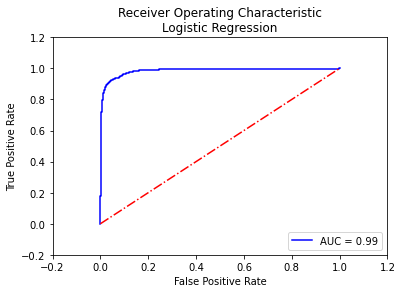

In [37]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_logreg=logreg.predict(X_val)
y_logreg_prob=logreg.predict_proba(X_val)[:,1]

#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_val,y_logreg))
print("Accuracy:\n",metrics.accuracy_score(y_val,y_logreg))
print("Precision:\n",metrics.precision_score(y_val,y_logreg))
print("Recall:\n",metrics.recall_score(y_val,y_logreg))
print("AUC:\n",metrics.roc_auc_score(y_val,y_logreg_prob))
auc=metrics.roc_auc_score(y_val,y_logreg_prob)

#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_val,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
threshold = 0.1

In [62]:
y_logreg_prob = logreg.predict_proba(X_val)[:,1]

In [63]:
prob_thresh = (y_logreg_prob>=threshold).astype('int')

In [64]:
CM_2_Thresh = confusion_matrix(y_val,prob_thresh)
CM_2_Thresh

array([[1680,  447],
       [  19, 2086]], dtype=int64)